# student ids:

160363,

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Data/greenhouse-gas-emissions.xlsx"
variables = pd.read_excel(file_path, sheet_name=1)   # variable descriptions
df = pd.read_excel(file_path, sheet_name=2)           # emission data

## Question 1
### Exploratory Data Analysis (EDA)
The provided dataset contains UK territorial greenhouse gas emissions by source and activity, cover-
ing the period from 1990 onwards. Emissions are attributed to the sector that emits them directly
and include indicators related to UK territorial totals, international aviation and shipping, and Paris
Agreement coverage.
Perform Exploratory Data Analysis (EDA) to investigate the key factors driving changes in UK
greenhouse gas emissions over time.
1. Write a Python program to perform a covariance- and correlation-based analysis to examine
relationships between emissions, sources, and activities across years. Do not use any built-in
covariance or correlation functions. You must implement your calculations.
2. Write another Python program to visualise your findings from the previous step and briefly
explain the observed emission patterns. Hints: You may consider using histograms, boxplots,
and scatterplots.

In [3]:
# Remove non-UK territorial emissions
territorial = df[df["Included in UK territorial total"].str.lower() == "yes"].copy()

In [4]:
# aggregate by year and sectors
SECTOR_COL = "Territorial Emissions Statistics sector"

sector_year = (
    territorial
    .groupby(["Year", SECTOR_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

In [5]:
# pivot to wide format (rows - years, columns - sectors)

pivot = (
    sector_year
    .pivot(index="Year", columns=SECTOR_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

print("Shape:", pivot.shape)
pivot.head()

Shape: (35, 8)


Territorial Emissions Statistics sector,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Year,,,,,,,,
1990,54.988754,109.492561,124.191169,203.990902,77.192227,155.662400,10.266883,55.039201
1991,54.800121,121.292199,122.552535,200.562839,78.080868,156.665141,9.772005,56.836696
1992,54.457877,117.743777,123.850246,188.466186,79.240850,149.650442,8.962862,58.000423
1993,53.561508,121.671071,124.995984,170.963203,78.927561,143.356940,8.401128,59.475666
1994,54.320493,116.627834,125.175291,166.731982,71.448923,145.437790,7.925957,60.982346


In [7]:
def mean(xs):
    xs = list(xs)
    return sum(xs) / len(xs)

def covariance(xs, ys, ddof=1):
    xs, ys = list(xs), list(ys)
    n = len(xs)
    mx, my = mean(xs), mean(ys)
    return sum((x - mx) * (y - my) for x, y in zip(xs, ys)) / (n - ddof)

def std(xs, ddof=1):
    xs = list(xs)
    n = len(xs)
    m = mean(xs)
    return math.sqrt(sum((x - m) ** 2 for x in xs) / (n - ddof))

def correlation(xs, ys):
    sx, sy = std(xs), std(ys)
    if sx == 0 or sy == 0:
        return float("nan")
    return covariance(xs, ys) / (sx * sy)

In [8]:
# --- Step 5: Build covariance and correlation matrices ---

sectors = pivot.columns.tolist()

cov_matrix = pd.DataFrame(index=sectors, columns=sectors, dtype=float)
corr_matrix = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        cov_matrix.loc[s1, s2] = covariance(pivot[s1].values, pivot[s2].values)
        corr_matrix.loc[s1, s2] = correlation(pivot[s1].values, pivot[s2].values)

print("Covariance matrix:")
display(cov_matrix.round(2))

print("\nCorrelation matrix:")
display(corr_matrix.round(3))

Covariance matrix:


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,7.29,28.16,11.57,99.48,41.04,89.26,8.15,38.83
Buildings and product uses,28.16,173.11,67.56,575.03,181.78,373.71,31.81,193.37
Domestic transport,11.57,67.56,58.91,268.73,65.55,132.82,8.32,78.62
Electricity supply,99.48,575.03,268.73,2564.24,677.64,1408.67,118.14,677.31
Fuel supply,41.04,181.78,65.55,677.64,268.90,567.09,54.18,256.58
Industry,89.26,373.71,132.82,1408.67,567.09,1231.17,117.08,538.61
LULUCF,8.15,31.81,8.32,118.14,54.18,117.08,12.10,49.70
Waste,38.83,193.37,78.62,677.31,256.58,538.61,49.70,277.05



Correlation matrix:


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,1.000,0.793,0.558,0.728,0.927,0.942,0.867,0.864
Buildings and product uses,0.793,1.000,0.669,0.863,0.843,0.810,0.695,0.883
Domestic transport,0.558,0.669,1.000,0.691,0.521,0.493,0.312,0.615
Electricity supply,0.728,0.863,0.691,1.000,0.816,0.793,0.671,0.804
Fuel supply,0.927,0.843,0.521,0.816,1.000,0.986,0.950,0.940
Industry,0.942,0.810,0.493,0.793,0.986,1.000,0.959,0.922
LULUCF,0.867,0.695,0.312,0.671,0.950,0.959,1.000,0.858
Waste,0.864,0.883,0.615,0.804,0.940,0.922,0.858,1.000


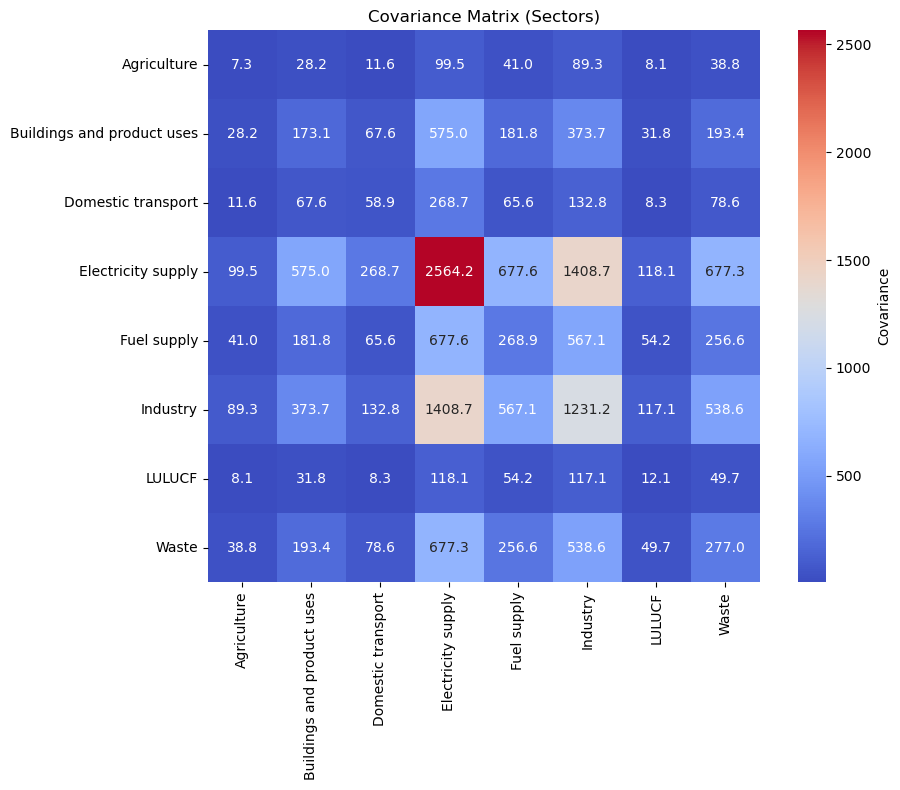

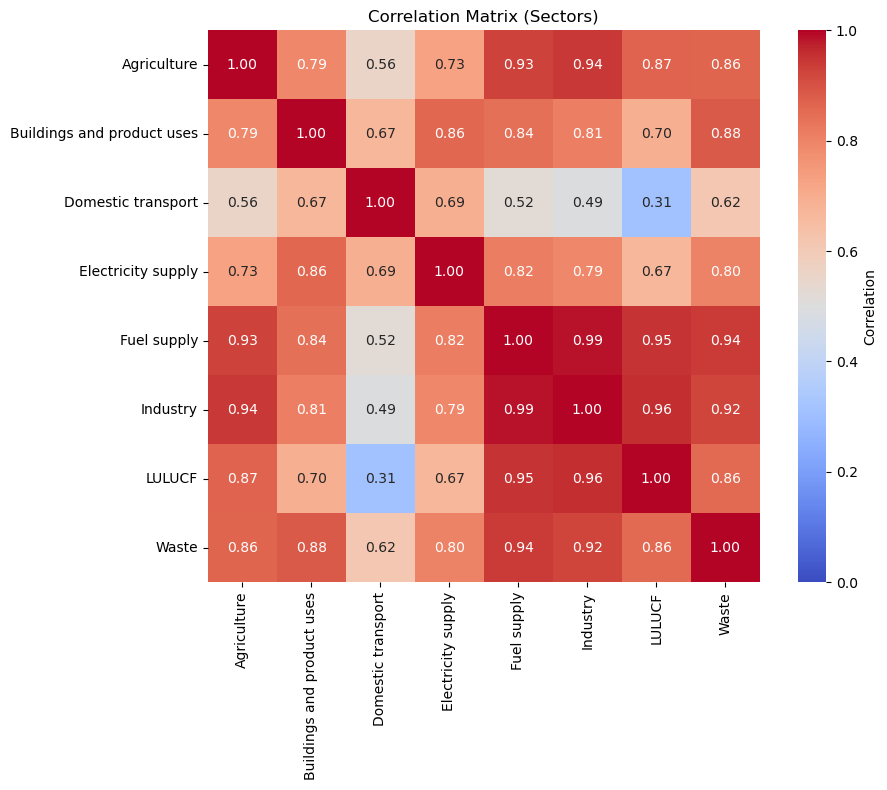

In [12]:
# --- Covariance matrix heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cov_matrix.astype(float),
    ax=ax,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    square=True,
    cbar_kws={"label": "Covariance"}
)
ax.set_title("Covariance Matrix (Sectors)")
plt.tight_layout()
plt.show()

# --- Correlation matrix heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Sectors)")
plt.tight_layout()
plt.show()

In [9]:
# --- Step 6: Year-over-year differenced correlation ---
# Strips out shared downward trend to show actual short-term co-movement

diff = pivot.diff().dropna()

diff_corr = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        diff_corr.loc[s1, s2] = correlation(diff[s1].values, diff[s2].values)

print("Correlation matrix (year-over-year changes):")
display(diff_corr.round(3))

Correlation matrix (year-over-year changes):


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,1.000,0.261,0.251,-0.101,-0.069,0.238,-0.185,-0.014
Buildings and product uses,0.261,1.000,0.033,0.389,0.044,0.205,-0.017,-0.049
Domestic transport,0.251,0.033,1.000,0.114,0.069,0.125,-0.094,0.180
Electricity supply,-0.101,0.389,0.114,1.000,-0.178,0.317,-0.098,-0.117
Fuel supply,-0.069,0.044,0.069,-0.178,1.000,-0.001,-0.049,0.244
Industry,0.238,0.205,0.125,0.317,-0.001,1.000,-0.043,0.055
LULUCF,-0.185,-0.017,-0.094,-0.098,-0.049,-0.043,1.000,-0.051
Waste,-0.014,-0.049,0.180,-0.117,0.244,0.055,-0.051,1.000


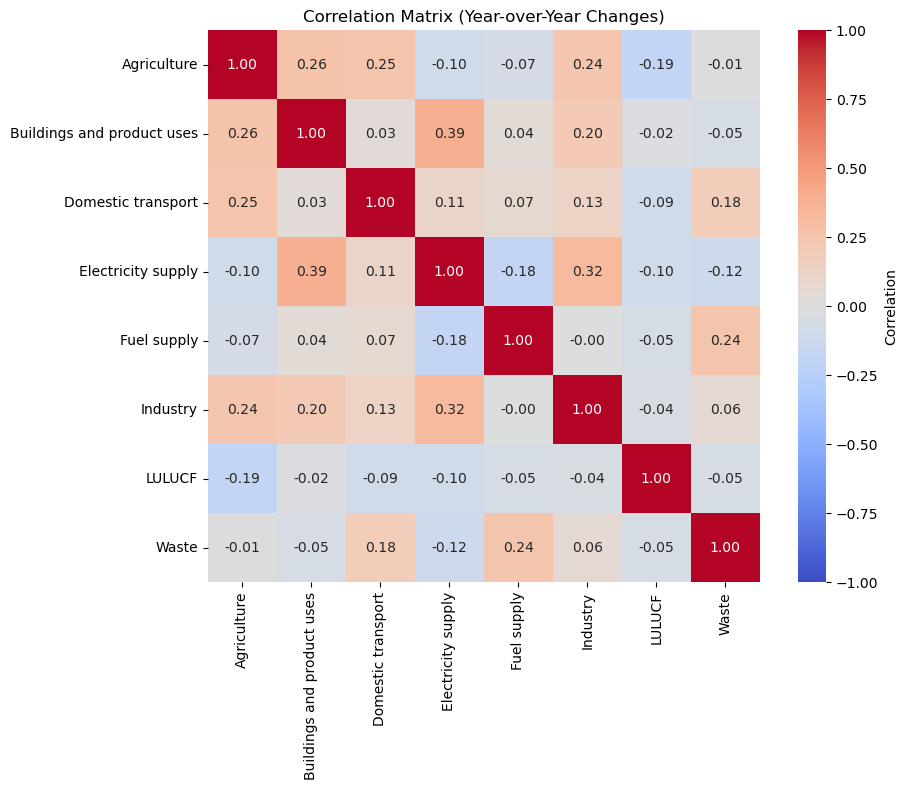

In [10]:
# --- Differenced correlation heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    diff_corr.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Year-over-Year Changes)")
plt.tight_layout()
plt.show()

# Question 2
## Cluster Analysis
Cluster analysis is used to group data points based on similarity in their attributes.
1. Chooseoneclusteringalgorithmdiscussedinthelecturesandapplyittogroupemissionsources
or activities based on their emission trajectories over time.
2. Clearlyjustifythevariablesusedforclustering(e.g.,emissionlevels,rateofchange,fuelgroup).
Interpret the resulting clusters and explain what they reveal about structural changes in UK
greenhouse gas emissions.
3. Relate your clustering results to UK climate policy by identifying which clusters align with
sectorstargeted under UKCarbonBudgets and which sectorsappear moreresistant toemission
reductions.

# Question 3
## Policy Interpretation and Critical Analysis
1. Using the column Included in UK territorial total, compare emission trends with and
without international aviation and shipping. Discuss how this distinction affects progress as-
sessment against UK Carbon Budgets.
2. UsingtheIncluded in UK Paris Agreement total indicator,identifywhichemissionsources
arecoveredundertheUK’sParisAgreementreporting. Explaintheimplicationsofthiscoverage
for interpreting national emission reduction performance.
3. Based on your data-driven findings, critically assess whether historical emission trends suggest
that the UK is structurally aligned with its long-term climate targets. Support your answer with
quantitative evidence from your analysis.